<a href="https://colab.research.google.com/github/root-epifit/Graphs/blob/main/Week_2/HW2/hw2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2, задача 1. Нахождение ранга корневого дерева

В этом задании требуется реализовать нахождение ранга корневого дерева с помощью поиска в глубину.

*Ранг* определяется для каждой вершины дерева. Для листьев ранг равен нулю. Для промежуточной вершины ранг равен максимуму среди рангов вершин ее потомков, если максимальный ранг среди потомков достигается на одном потомке, и ранг на 1 больше ранга потомков, если максимальный ранг среди потомков достигается сразу на двух потомках. Рангом дерева называется ранг ее корня.

Для примера, ранги вершин дерева на картинке ниже подписаны в самих вершинах. Ранг всего дерева равен 2.

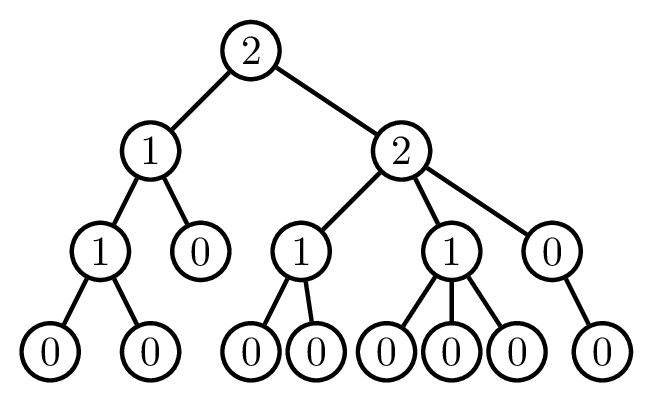


---
**Правила сдачи.** Это первая из двух задач домашнего задания 2. Каждая задача оценивается в 5 баллов.

Дедлайн второго домашнего задания --- **22 февраля в 19:00**. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 23 февраля. 

Также можно отправить решения до **19:00 20 февраля**. Тогда они будут проверены до 19:00 21 февраля и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---

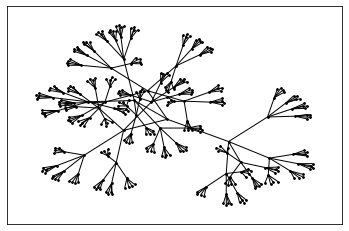

In [35]:
# Задаем граф

import networkx as nx
import matplotlib.pyplot as plt

# В этой строчке задается случайное дерево на 100 вершинах. При каждом перезапуске блока будет создаваться новое дерево.
#tree = nx.random_tree(100)

# В варианте в строчке ниже генерируется регулярное дерево ветвления 4 и глубины 4
tree = nx.generators.classic.balanced_tree(4, 4)

# В варианте в строчке ниже генерируется биномиальное дерево порядка 6
# tree = nx.binomial_tree(6)

#nx.draw_networkx(tree)

# Рисуем граф
def draw_G(G):
    options = {
        "node_size": 3,
        "node_color": "black",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }

    nx.draw_networkx(G, with_labels=False, **options)
    plt.show()
    
draw_G(tree)

In [38]:
# В этом блоке нужно реализовать подсчет ранга дерева с помощью поиска в глубину
# Мы считаем вершину с меткой 0 корнем дерева

# Заводим множество посещенных вершин
visited = {}
for v in tree:
  visited[v] = False

# В этой функции мы будем подсчитывать ранг дерева с корнем в вершине v
def count_rank(v):
    # Реализуйте здесь ваше решение

    # Массивы rank-ов вершин и потомков 
    # массив потомков упростит работу с дочерними узлами, 
    # т.к. tree[v] в списке соседних узлов возвращает и сам узел из которого пришли
    rank = {}
    neigbour = {}
    for i in tree:
        rank[i], neigbour[i]  = -1, -1

    def is_leaf(v):
        return  0 == len(neigbour[v])

    def calc_rank(v):
        if is_leaf(v): 
            rank[v] = 0
        else:
            # сортированный массив рангов потомков
            neighbours_ranks = sorted([rank[i] for i in neigbour[v]])
            if len(neighbours_ranks) >=2 and (neighbours_ranks[-1] == neighbours_ranks[-2]):
                # число потомков больше 2-х и два из них имеют макс.rank
                rank[v] = neighbours_ranks[-1] + 1
            else:
                rank[v] = neighbours_ranks[-1]

    def on_enter(v, tree=None):
        # Заполняем список вершин потомков, исключая из списка вершину, из которой пришли
        neigbour[v]=[ i for i in (list(tree[v])) if not visited[i]]
        
    def on_exit(v):
        calc_rank(v)

    def Explore(v, tree=None):
        visited[v]= True
        on_enter(v, tree=tree)
        for u in tree[v]:
            if not visited[u]:
                Explore(u, tree=tree)
        on_exit(v)

    Explore(v, tree=tree)
    #print(rank)
    return rank[v]
  
print(f'Ранг дерева: {count_rank(0)}')

Ранг дерева: 4


Rank = 2


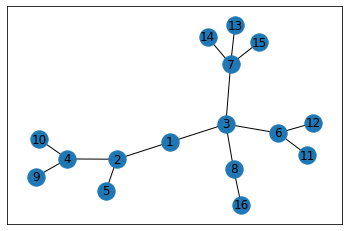

In [39]:
################################
# Отладка

# Строим дерево, как в объяснении про ранг и на нем отлаживаемся
tree = nx.Graph()
tree.add_nodes_from(list(range(1,17)))
tree.add_edges_from([
    (1,2),(1,3),(2,4),(2,5),(4,9),(4,10),
    (3,6),(3,7),(3,8),(6,11),(6,12),(7,13),(7,14),(7,15),(8,16) ])

nx.draw_networkx(tree)

# Заводим множество посещенных вершин
visited = {}
for v in tree:
  visited[v] = False

rank = count_rank(1)
print(f'Rank = {rank}')  
assert 2 == rank, 'ERROR: Ранг должен быть = 2'